#### Code to plot mean LWC profiles for each bin of IORG
##### author: Claudia Acquistapace
##### date: 13 feb 2023


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from warnings import warn
import datetime as dt
from scipy import interpolate
import matplotlib as mpl
import os.path
import itertools
import os.path

data = xr.open_dataset('/net/ostro/ML_work_DC/IORG_LWC_era5.nc')
data    

<xarray.Dataset>
Dimensions:   (n_crops: 51000, levels: 37)
Coordinates:
  * n_crops   (n_crops) int64 0 1 2 3 4 5 ... 50995 50996 50997 50998 50999
  * levels    (levels) int32 1000 975 950 925 900 875 850 ... 20 10 7 5 3 2 1
Data variables:
    im_names  (n_crops) object ...
    datetime  (n_crops) object ...
    IORG      (n_crops) float64 ...
    clwc_std  (n_crops, levels) float64 ...
    clwc      (n_crops, levels) float64 ...
Attributes: (12/19)
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2023-02-08 16:51:45.276443
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    ...                ...
    COMMENT:           
    Conventions:       CF-1.8
    title:             ERA5 variables for all the crops of the selected satel...
    institution:       University of Cologne (UNI), Germany
    history:           source: ERA5\nprocessing: https://github.com/ClauCloud...
    featureType:       satellite-era5

In [2]:
# defining iorg bins based on DC and histogram of iorg values
#iorg_bin_edges = [0.3, 0.5, 0.7, 1.]
#less than 0.45, 0.45 - 0.55, more than 0.55
iorg_bin_edges = [0., 0.45, 0.55, 1.]
bin_strings = ['iorg < 0.45', '0.45 < iorg <0.55', 'iorg > 0.55'] 
mean_clwc = np.zeros((len(data.levels.values),len(iorg_bin_edges)-1))
std_clwc = np.zeros((len(data.levels.values),len(iorg_bin_edges)-1))
mean_clwc.fill(np.nan)
std_clwc.fill(np.nan)

# selecting LWC profiles corresponding to the different bins
for ind_bin in range(len(iorg_bin_edges)-1):
    # setting bin edges
    low_edge = iorg_bin_edges[ind_bin]
    up_edge = iorg_bin_edges[ind_bin+1]
    
    
    # selecting profiles
    sel_profiles = data.where((data.IORG > low_edge) * (data.IORG <= up_edge))
    print(sel_profiles)

    # calculate mean and std profiles of clwc
    clwc = sel_profiles.clwc.values
    clwc[clwc==0.] = np.nan
    print(np.shape(np.nanmean(clwc, axis=0)))
    mean_clwc[:,ind_bin] = np.nanmean(clwc, axis=0)
    std_clwc[:,ind_bin] = np.nanstd(clwc, axis=0)

<xarray.Dataset>
Dimensions:   (n_crops: 51000, levels: 37)
Coordinates:
  * n_crops   (n_crops) int64 0 1 2 3 4 5 ... 50995 50996 50997 50998 50999
  * levels    (levels) int32 1000 975 950 925 900 875 850 ... 20 10 7 5 3 2 1
Data variables:
    im_names  (n_crops) object nan nan nan nan nan nan ... nan nan nan nan nan
    datetime  (n_crops) object nan nan nan nan nan nan ... nan nan nan nan nan
    IORG      (n_crops) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    clwc_std  (n_crops, levels) float64 nan nan nan nan nan ... nan nan nan nan
    clwc      (n_crops, levels) float64 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/19)
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2023-02-08 16:51:45.276443
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    ...                ...
    CO

/tmp/ipykernel_3765013/571983816.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(strlev)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma


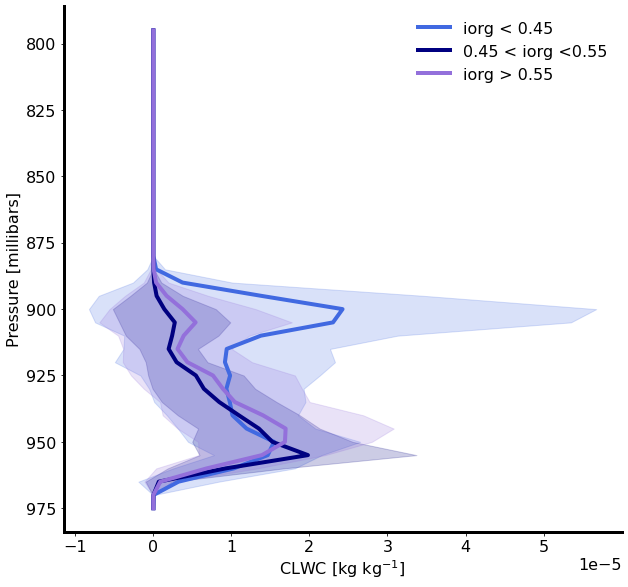

In [3]:
# plot quicklook of filtered and corrected mdv for checking
levels = data.levels.values
path_out = '/net/ostro/ML_work_DC/iorg_analysis/'
labelsizeaxes   = 14
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
cbarAspect      = 10
fontSizeCbar    = 16
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.rcParams.update({'font.size':16})


strlev = []
for ind, lev in enumerate(levels):
    strlev.append(str(lev))
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
rcParams['font.sans-serif'] = ['Tahoma']
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)

#for ind_plot in range(len(iorg_bin_edges)-1):
mean = mean_clwc[:,0]
std = std_clwc[:,0]
    
ax.plot(mean, np.arange(len(levels)), 'royalblue', linewidth=4, rasterized=True, label=bin_strings[0]) 
ax.fill_betweenx(np.arange(len(levels)), mean-std, mean+std, color='royalblue', alpha=0.2)
mean = mean_clwc[:,1]
std = std_clwc[:,1]
ax.plot(mean, np.arange(len(levels)), 'navy', linewidth=4, rasterized=True, label=bin_strings[1])    
ax.fill_betweenx(np.arange(len(levels)), mean-std, mean+std, color='navy', alpha=0.2)
mean = mean_clwc[:,2]
std = std_clwc[:,2]
ax.plot(mean, np.arange(len(levels)), 'mediumpurple', linewidth=4, rasterized=True, label=bin_strings[2])    
ax.fill_betweenx(np.arange(len(levels)), mean-std, mean+std, color='mediumpurple', alpha=0.2)


ax.set_ylabel('Pressure [millibars]')
ax.set_xlabel('CLWC [kg kg$^{-1}$]')

ax.set_yticklabels(strlev)
ax.legend(frameon=False)
fig.savefig(path_out+'profiles_lwc_iorg_bins_2.png')# An "interface" to matplotlib.axes.Axes.hist() method